![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [3]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Who are the most popular directors and writers?

In [4]:
# creating dataframes from csv's
ratings_df = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
crew_df = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
names_df = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
popularity_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
title_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')

#### Explore dataframes - especially, popularity_df

In [5]:
popularity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [6]:
popularity_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
title_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [8]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


#### Find Top 100 most popular movies

In [9]:
top_100_popularity_df = popularity_df.nlargest(100,['popularity'])
top_100_popularity_df.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


#### Find the director's names for the top 100 most popular movies.

In [10]:
#need to clean up duplicates before running this.
#top_100_popularity_df_join_title = top_100_popularity_df.join(title_df.set_index(['title'], verify_integrity=True), on='original_title', how='left')
#top_100_popularity_df_join_title.info()

#### Clean up duplicates in title_df

In [11]:
title_df_join = title_df
title_df_join = title_df_join.drop_duplicates(subset=['title'])
title_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252781 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           252781 non-null  object 
 1   ordering           252781 non-null  int64  
 2   title              252781 non-null  object 
 3   region             221956 non-null  object 
 4   language           32890 non-null   object 
 5   types              120946 non-null  object 
 6   attributes         12527 non-null   object 
 7   is_original_title  252763 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 17.4+ MB


In [12]:
top_100_popularity_df_join_title = top_100_popularity_df.set_index('original_title').join(title_df_join.set_index('title'))
top_100_popularity_df_join_title.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, A Quiet Place to 君の名は。
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         100 non-null    int64  
 1   genre_ids          100 non-null    object 
 2   id                 100 non-null    int64  
 3   original_language  100 non-null    object 
 4   popularity         100 non-null    float64
 5   release_date       100 non-null    object 
 6   title              100 non-null    object 
 7   vote_average       100 non-null    float64
 8   vote_count         100 non-null    int64  
 9   title_id           96 non-null     object 
 10  ordering           96 non-null     float64
 11  region             69 non-null     object 
 12  language           20 non-null     object 
 13  types              78 non-null     object 
 14  attributes         2 non-null      object 
 15  is_original_title  96 non-null     float64
dtypes: float64(4), in

In [13]:
top_100_popularity_df_join_title.head()

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,title_id,ordering,region,language,types,attributes,is_original_title
A Quiet Place,23847,"[18, 27, 53, 878]",447332,en,29.154,2018-04-06,A Quiet Place,7.3,5848,tt6347308,1.0,NL,NaN,NaN,NaN,0.0
A Star Is Born,23828,"[18, 10749, 10402]",332562,en,35.848,2018-10-05,A Star Is Born,7.5,5676,tt1517451,11.0,US,en,NaN,NaN,0.0
Ant-Man,14171,"[878, 28, 12]",102899,en,32.715,2015-07-17,Ant-Man,7.1,11949,tt0478970,11.0,FR,NaN,imdbDisplay,NaN,0.0
Ant-Man and the Wasp,23816,"[28, 12, 878, 35]",363088,en,44.729,2018-07-06,Ant-Man and the Wasp,7.0,6290,tt5095030,28.0,IT,NaN,imdbDisplay,NaN,0.0
Aquaman,23824,"[28, 12, 14]",297802,en,38.102,2018-12-21,Aquaman,6.8,6155,tt1477834,10.0,MX,NaN,imdbDisplay,NaN,0.0


#### Find director code by joining to crew_df.

In [14]:
top_100_popularity_df_join_title_join_crew = top_100_popularity_df_join_title.set_index('title_id').join(crew_df.set_index('tconst'))
top_100_popularity_df_join_title_join_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, tt0451279 to nan
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         100 non-null    int64  
 1   genre_ids          100 non-null    object 
 2   id                 100 non-null    int64  
 3   original_language  100 non-null    object 
 4   popularity         100 non-null    float64
 5   release_date       100 non-null    object 
 6   title              100 non-null    object 
 7   vote_average       100 non-null    float64
 8   vote_count         100 non-null    int64  
 9   ordering           96 non-null     float64
 10  region             69 non-null     object 
 11  language           20 non-null     object 
 12  types              78 non-null     object 
 13  attributes         2 non-null      object 
 14  is_original_title  96 non-null     float64
 15  directors          96 non-null     object 
 16  writers            95 n

In [15]:
top_100_popularity_df_join_title_join_crew.head()

,Unnamed: 0,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count,ordering,region,language,types,attributes,is_original_title,directors,writers
tt0451279,20628,"[12, 14, 10752, 10749]",297762,en,31.618,2017-06-02,Wonder Woman,7.3,12566,11.0,CA,fr,imdbDisplay,NaN,0.0,nm0420941,"nm0374302,nm0811583,nm0297229,nm0551376,nm4243936"
tt0455944,11030,"[53, 28, 80]",156022,en,28.942,2014-09-26,The Equalizer,7.2,4989,1.0,DE,NaN,imdbDisplay,NaN,0.0,nm0298807,"nm0921013,nm0805994,nm2030456"
tt0478970,14171,"[878, 28, 12]",102899,en,32.715,2015-07-17,Ant-Man,7.1,11949,11.0,FR,NaN,imdbDisplay,NaN,0.0,nm0715636,"nm0942367,nm0180428,nm0570912,nm0748620,nm0498..."
tt0800369,2468,"[12, 14, 28]",10195,en,38.068,2011-05-06,Thor,6.7,12764,10.0,RO,NaN,alternative,NaN,0.0,nm0000110,"nm1005420,nm0826714,nm0668309,nm0833089,nm0698..."
tt0816692,11032,"[12, 18, 878]",157336,en,28.440,2014-11-05,Interstellar,8.2,18597,14.0,US,NaN,NaN,NaN,0.0,nm0634240,"nm0634300,nm0634240"


#### Explode directors.

In [16]:
top_100_popularity_explode_directors = top_100_popularity_df_join_title_join_crew.explode('directors')
top_100_popularity_explode_directors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, tt0451279 to nan
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         100 non-null    int64  
 1   genre_ids          100 non-null    object 
 2   id                 100 non-null    int64  
 3   original_language  100 non-null    object 
 4   popularity         100 non-null    float64
 5   release_date       100 non-null    object 
 6   title              100 non-null    object 
 7   vote_average       100 non-null    float64
 8   vote_count         100 non-null    int64  
 9   ordering           96 non-null     float64
 10  region             69 non-null     object 
 11  language           20 non-null     object 
 12  types              78 non-null     object 
 13  attributes         2 non-null      object 
 14  is_original_title  96 non-null     float64
 15  directors          96 non-null     object 
 16  writers            95 n

##### Looks like I didn't need to explode directors - each movie only had one director.

#### Join to names_df.

In [17]:
top_100_popularity_explode_directors_join_names = top_100_popularity_explode_directors.set_index('directors').join(names_df.set_index('nconst'))
top_100_popularity_explode_directors_join_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, nm0000110 to nan
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          100 non-null    int64  
 1   genre_ids           100 non-null    object 
 2   id                  100 non-null    int64  
 3   original_language   100 non-null    object 
 4   popularity          100 non-null    float64
 5   release_date        100 non-null    object 
 6   title               100 non-null    object 
 7   vote_average        100 non-null    float64
 8   vote_count          100 non-null    int64  
 9   ordering            96 non-null     float64
 10  region              69 non-null     object 
 11  language            20 non-null     object 
 12  types               78 non-null     object 
 13  attributes          2 non-null      object 
 14  is_original_title   96 non-null     float64
 15  writers             95 non-null     object 
 16  prima

#### Make table of Number of movies in Top 100 Popularity by Director.

In [18]:
Director_Count_Popularity = top_100_popularity_explode_directors_join_names['primary_name'].value_counts()
Director_Count_Popularity.head(10)

David Yates         5
Bryan Singer        3
Rob Marshall        2
Joss Whedon         2
Rian Johnson        2
Shane Black         2
J.J. Abrams         2
Taika Waititi       2
Denis Villeneuve    2
Kenneth Branagh     2
Name: primary_name, dtype: int64

#### Histogram of the value counts of Directors with Movies in Top 100 most Popular.

Text(0.5, 1.0, 'Number of Movies in Top 100 most Popular on IMDB.com')

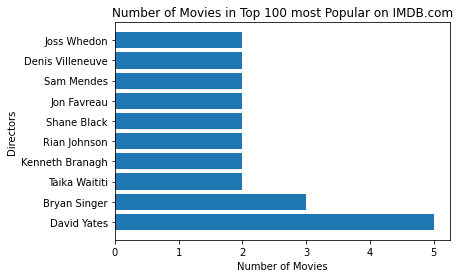

In [19]:
labels = ['David Yates', 'Bryan Singer', 'Taika Waititi', 'Kenneth Branagh', 
          'Rian Johnson', 'Shane Black', 'Jon Favreau', 'Sam Mendes', 
          'Denis Villeneuve','Joss Whedon']
values = [5, 3, 2, 2, 2, 2, 2, 2, 2, 2]

plt.barh(labels, values)
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.title('Number of Movies in Top 100 most Popular on IMDB.com')

#### These are all highly acclaimed directors and will make a great short-list for Microsoft to pursue for their upcoming movie.

### Who are the directors of the most highly rated movies by imdb ratings?
* This did not work well because the top 5000 rated movies did not include highly acclaimed or high grossing films.  
* I will not be using these directors, but want you to see my work and why I chose not to recommend them to Microsoft.

#### Find the top 100 highest rated movies.

In [20]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
#make a copy of ratings_df
ratings_df_copy = ratings_df.copy()

In [23]:
top_100_ratings_df = ratings_df.nlargest(5000,['averagerating'])
top_100_ratings_df

,tconst,averagerating,numvotes
6784,tt5390098,10.0,5
7017,tt6295832,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
27644,tt8730716,10.0,5
...,...,...,...
54870,tt1997514,8.4,9
55016,tt2193091,8.4,251
55159,tt2358592,8.4,10522
55323,tt2707088,8.4,5


#### Join top_100_ratings to crew_df


In [24]:
crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [25]:
top_100_ratings_df_join_crew = top_100_ratings_df.join(crew_df.set_index(['tconst'], verify_integrity=True), on='tconst', how='left')
top_100_ratings_df_join_crew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 6784 to 55342
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         5000 non-null   object 
 1   averagerating  5000 non-null   float64
 2   numvotes       5000 non-null   int64  
 3   directors      4901 non-null   object 
 4   writers        3634 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 234.4+ KB


In [26]:
top_100_ratings_df_join_crew

,tconst,averagerating,numvotes,directors,writers
6784,tt5390098,10.0,5,"nm4637768,nm5472684",NaN
7017,tt6295832,10.0,5,nm3704168,NaN
8992,tt1770682,10.0,5,nm4166962,nm4166961
26153,tt2632430,10.0,5,nm0880350,nm0880350
27644,tt8730716,10.0,5,nm4568586,nm9500109
...,...,...,...,...,...
54870,tt1997514,8.4,9,nm0374924,NaN
55016,tt2193091,8.4,251,nm0155874,nm0274109
55159,tt2358592,8.4,10522,nm5237694,nm5237694
55323,tt2707088,8.4,5,nm1770669,NaN


In [27]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [28]:
names_df

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


#### Convert directors column to list, then explode.

In [29]:
top_100_ratings_df_join_crew['directors'] = top_100_ratings_df_join_crew['directors'].str.split(',')
top_100_ratings_df_join_crew

,tconst,averagerating,numvotes,directors,writers
6784,tt5390098,10.0,5,"[nm4637768, nm5472684]",NaN
7017,tt6295832,10.0,5,[nm3704168],NaN
8992,tt1770682,10.0,5,[nm4166962],nm4166961
26153,tt2632430,10.0,5,[nm0880350],nm0880350
27644,tt8730716,10.0,5,[nm4568586],nm9500109
...,...,...,...,...,...
54870,tt1997514,8.4,9,[nm0374924],NaN
55016,tt2193091,8.4,251,[nm0155874],nm0274109
55159,tt2358592,8.4,10522,[nm5237694],nm5237694
55323,tt2707088,8.4,5,[nm1770669],NaN


In [30]:
top_100_ratings_df_join_crew_explode = top_100_ratings_df_join_crew.explode('directors')
top_100_ratings_df_join_crew_explode

,tconst,averagerating,numvotes,directors,writers
6784,tt5390098,10.0,5,nm4637768,NaN
6784,tt5390098,10.0,5,nm5472684,NaN
7017,tt6295832,10.0,5,nm3704168,NaN
8992,tt1770682,10.0,5,nm4166962,nm4166961
26153,tt2632430,10.0,5,nm0880350,nm0880350
...,...,...,...,...,...
54870,tt1997514,8.4,9,nm0374924,NaN
55016,tt2193091,8.4,251,nm0155874,nm0274109
55159,tt2358592,8.4,10522,nm5237694,nm5237694
55323,tt2707088,8.4,5,nm1770669,NaN


#### Join exploded ratings_df_join_crew to names_df.

In [31]:
top_100_ratings_df_join_crew_join_names = top_100_ratings_df_join_crew_explode.join(names_df.set_index(['nconst'], verify_integrity=True), on='directors', how='left')
top_100_ratings_df_join_crew_join_names

,tconst,averagerating,numvotes,directors,writers,primary_name,birth_year,death_year,primary_profession,known_for_titles
6784,tt5390098,10.0,5,nm4637768,NaN,Masahiro Hayakawa,NaN,NaN,"director,producer","tt2006797,tt5390098"
6784,tt5390098,10.0,5,nm5472684,NaN,Michael J. Sanderson,1983.0,NaN,"cinematographer,camera_department,producer","tt6047276,tt5390098,tt5931924,tt2636480"
7017,tt6295832,10.0,5,nm3704168,NaN,Michiel Brongers,NaN,NaN,"director,writer","tt2203394,tt6295832,tt1549132,tt1820401"
8992,tt1770682,10.0,5,nm4166962,nm4166961,Daniel Alexander,NaN,NaN,director,tt1770682
26153,tt2632430,10.0,5,nm0880350,nm0880350,Mohamed Ulad-Mohand,NaN,NaN,"producer,director,writer","tt5442230,tt0217302,tt2554716,tt2632430"
...,...,...,...,...,...,...,...,...,...,...
54870,tt1997514,8.4,9,nm0374924,NaN,Olaf Held,1970.0,NaN,"director,writer,editor","tt2943432,tt2022371,tt1950120,tt1769379"
55016,tt2193091,8.4,251,nm0155874,nm0274109,Maro Chermayeff,NaN,NaN,"producer,director,writer","tt2073029,tt7697870,tt0320010,tt0168923"
55159,tt2358592,8.4,10522,nm5237694,nm5237694,Pawan Kumar,NaN,NaN,"writer,actor,director","tt2358592,tt8733898,tt5377564,tt3031204"
55323,tt2707088,8.4,5,nm1770669,NaN,Doug Hawes-Davis,NaN,NaN,"producer,director,cinematographer","tt0795174,tt4870186,tt0433408,tt2707088"


#### Make a table of the director's names and how many movies they have in the top 5000 by rating.
* I wonder if a single director shows up multiple times?

In [32]:
director_count_top_5000_ratings = top_100_ratings_df_join_crew_join_names['primary_name'].value_counts()
director_count_top_5000_ratings.head(20)

Larry Rosen                11
Paul Dugdale                6
Steve Ravic                 6
Tom Logan                   6
Sergey A.                   6
Ian Cranston                6
Pauli Janhunen Calderón     5
Gábor Murai                 4
Rob Sibley                  4
Zheng Zhou                  4
Gorman Bechard              4
Yasmine Asha                4
Nick Nanton                 4
Branko Istvancic            4
Nuo Wang                    4
Dick Carruthers             4
John C. Brown               4
Miguel Gaudêncio            4
Nick Wickham                4
Dietmar Post                3
Name: primary_name, dtype: int64

These directors have not produced movies that are widely acclaimed, despite having many movies with high ratings on imdb.  So, I will likely pursue a different characteristic, such as the popularity column in tmdb.movies.csv.gz or worldwide gross.

### How does genre effect worldwide gross?

Does genre_id connect to genre in any other dataframe?

In [33]:
genre_id_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
genre_id_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


#### genre_id in the genre_id_df does not connect to genre in any  other dataframe that I have available, so I will not use it to correlate genre to worldwide gross.

In [34]:
# creating dataframes from csv's
genre_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
worldwide_gross_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [35]:
#exploring dataframes
genre_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [36]:
title_df

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


#### Ensuring that title_df has corresponding movies in genre_df

In [37]:
print(genre_df.loc[genre_df['tconst'] == 'tt9880178'])

           tconst  primary_title original_title  start_year  runtime_minutes  \
145874  tt9880178  The Attention    La atención        2019             61.0   

             genres  
145874  Documentary  


#### Exploring worldwide gross to figure out how to trim to top 100 movies

In [38]:
worldwide_gross_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


#### Convert worldwide_gross to int

In [39]:
convert_worldwide_gross = worldwide_gross_df
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].str.replace(',', '')
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].str.replace('$', '')
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].astype(int)
convert_worldwide_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747


#### Trimming wordwide_gross_df to top 100 worldwide gross movies

In [40]:
top_100_gross = convert_worldwide_gross
top_100_gross = top_100_gross.nlargest(100,['worldwide_gross'])
top_100_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864
...,...,...,...,...,...,...
54,55,"May 23, 2014",X-Men: Days of Future Past,"$200,000,000","$233,921,534",747862775
196,97,"Jun 8, 2012",Madagascar 3: Europe's Most Wanted,"$145,000,000","$216,391,482",746921271
99,100,"Aug 5, 2016",Suicide Squad,"$175,000,000","$325,100,054",746059887
52,53,"Jun 21, 2013",Monsters University,"$200,000,000","$268,488,329",743588329


#### Joining dataframes to ensure all necessary data is in the same dataframe
* This results in an error - commented out to ease future workflow

In [41]:
#genre_df_join = genre_df
#top_100_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
#top_100_gross.head()

#### Clean up genre_df and maybe top_100_df by searching for duplicates.

In [42]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


##### Considering the entries(146144) equals the Non-Null(146144) for primary_title, I know that I don't need to drop any movies that are listed without a title.

Now, I need to search for the duplicate values in primary_title.

##### Dropping duplicates in primary_title column of genre_df_join

In [43]:
genre_df_join = genre_df
genre_df_join = genre_df_join.drop_duplicates(subset=['primary_title'])
genre_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136071 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           136071 non-null  object 
 1   primary_title    136071 non-null  object 
 2   original_title   136055 non-null  object 
 3   start_year       136071 non-null  int64  
 4   runtime_minutes  106598 non-null  float64
 5   genres           131180 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.3+ MB


#### Left join without the duplicates.

In [44]:
top_100_gross_join = top_100_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_100_gross_join.tail(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
49,50,"Jun 30, 2004",Spider-Man 2,"$200,000,000","$373,524,485",795110670,NaN,NaN,NaN,NaN,NaN
3525,26,"Jun 11, 1982",ET: The Extra-Terrestrial,"$10,500,000","$435,110,554",792965326,NaN,NaN,NaN,NaN,NaN
139,40,"May 24, 2013",Fast and Furious 6,"$160,000,000","$238,679,850",789300444,NaN,NaN,NaN,NaN,NaN
24,25,"May 26, 2017",Pirates of the Caribbean: Dead Men Tell No Tales,"$230,000,000","$172,558,876",788241137,tt1790809,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,129.0,"Action,Adventure,Fantasy"
91,92,"Jul 27, 2018",Mission: ImpossibleâFallout,"$178,000,000","$220,159,104",787456552,NaN,NaN,NaN,NaN,NaN
314,15,"May 18, 2018",Deadpool 2,"$110,000,000","$324,591,735",786680557,tt5463162,Deadpool 2,2018.0,119.0,"Action,Adventure,Comedy"
75,76,"May 22, 2008",Indiana Jones and the Kingdom of the Crystal S...,"$185,000,000","$317,101,119",786635413,NaN,NaN,NaN,NaN,NaN
3464,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,"$11,000,000","$460,998,007",786598007,NaN,NaN,NaN,NaN,NaN
113,14,"Aug 1, 2014",Guardians of the Galaxy,"$170,000,000","$333,172,112",770867516,tt2015381,Guardians of the Galaxy,2014.0,121.0,"Action,Adventure,Comedy"
264,65,"May 19, 2006",The Da Vinci Code,"$125,000,000","$217,536,138",767820459,NaN,NaN,NaN,NaN,NaN


#### Great! Now, were all 100 movies joined?

In [45]:
top_100_gross_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 159
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   release_date       100 non-null    object 
 2   movie              100 non-null    object 
 3   production_budget  100 non-null    object 
 4   domestic_gross     100 non-null    object 
 5   worldwide_gross    100 non-null    int64  
 6   tconst             62 non-null     object 
 7   original_title     62 non-null     object 
 8   start_year         62 non-null     float64
 9   runtime_minutes    59 non-null     float64
 10  genres             61 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.4+ KB


#### Yes, they were, however only 61 of the movies have genre data. Should I figure out how to pull the top 100 movies with genre data, or add genre data to 39 movies?

In [46]:
print(top_100_gross_join.loc[top_100_gross_join['genres'] == 'NaN'])

Empty DataFrame
Columns: [id, release_date, movie, production_budget, domestic_gross, worldwide_gross, tconst, original_title, start_year, runtime_minutes, genres]
Index: []


In [47]:
top_100_gross_join['genres'].isnull().values.sum()

39

In [48]:
missing_genre = pd.isnull(top_100_gross_join['genres'])
top_100_gross_join[missing_genre]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,NaN
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,NaN
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747,NaN,NaN,NaN,NaN,NaN
425,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,"$94,000,000","$377,845,905",1141403341,NaN,NaN,NaN,NaN,NaN
27,28,"Jul 7, 2006",Pirates of the Caribbean: Dead Manâs Chest,"$225,000,000","$423,315,812",1066215812,NaN,NaN,NaN,NaN,NaN
824,25,"Jun 11, 1993",Jurassic Park,"$63,000,000","$395,708,305",1038812584,NaN,NaN,NaN,NaN,NaN
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,"$115,000,000","$474,544,677",1027044677,NaN,NaN,NaN,NaN,NaN
74,75,"Jul 18, 2008",The Dark Knight,"$185,000,000","$533,720,947",1001996207,NaN,NaN,NaN,NaN,NaN
262,63,"Nov 16, 2001",Harry Potter and the Sorcererâs Stone,"$125,000,000","$317,871,467",975047606,NaN,NaN,NaN,NaN,NaN
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425",963420425,NaN,NaN,NaN,NaN,NaN


In [49]:
print(genre_df.loc[genre_df['primary_title'] == 'Coco'])

            tconst primary_title original_title  start_year  runtime_minutes  \
5231    tt10453328          Coco           Coco        2018              NaN   
38424    tt2380307          Coco           Coco        2017            105.0   
117464   tt7002100          Coco           Coco        2017             98.0   

                            genres  
5231                           NaN  
38424   Adventure,Animation,Comedy  
117464                      Horror  


#### Now, I see that there are many movies with the same name in the genre_df and this is causing issues.  
* Clearly, Coco should be returning as the tconst tt2380307, rather than the tt10453328.   
* So, I am going to try joining the title_df to the top_100_join as titles_df_join before joining that dataframe with genre_df_join.

In [50]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [51]:
title_df_join = title_df
title_df_join = title_df.drop_duplicates(subset=['title'])
title_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252781 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           252781 non-null  object 
 1   ordering           252781 non-null  int64  
 2   title              252781 non-null  object 
 3   region             221956 non-null  object 
 4   language           32890 non-null   object 
 5   types              120946 non-null  object 
 6   attributes         12527 non-null   object 
 7   is_original_title  252763 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 17.4+ MB


In [52]:
title_df_join = top_100_gross.join(title_df_join.set_index(['title'], verify_integrity=True), on='movie', how='left')
title_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 159
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   release_date       100 non-null    object 
 2   movie              100 non-null    object 
 3   production_budget  100 non-null    object 
 4   domestic_gross     100 non-null    object 
 5   worldwide_gross    100 non-null    int64  
 6   title_id           62 non-null     object 
 7   ordering           62 non-null     float64
 8   region             46 non-null     object 
 9   language           9 non-null      object 
 10  types              44 non-null     object 
 11  attributes         2 non-null      object 
 12  is_original_title  62 non-null     float64
dtypes: float64(2), int64(2), object(9)
memory usage: 10.9+ KB


#### Sadly, the title_id column (62 non-null) will not net us much more reliable data than using the titles to join between top_100_df (61 non-null) and genre_df. 

* So, I think I will clean up the top_100_join dataframe by manually checking and changing the relevant movies.

* In order to cut down on some of the work, I will cut it down to the top 50 grossing movies.

#### trimming wordwide_gross_df to top 50 worldwide gross movies

In [53]:
top_50_gross = convert_worldwide_gross
top_50_gross = top_100_gross.nlargest(50,['worldwide_gross'])
top_50_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864


#### Join top_50_gross to genre_df_join

In [54]:
top_50_gross_join = top_50_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_50_gross_join

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Horror
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,Adventure
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,NaN


In [55]:
#reset top_50_gross_join index
#top_50_gross_join.reset_index(drop=True, inplace=True)
#top_50_gross_join

#### Find and replace NaN and incorrect genres

In [56]:
missing_genre_50 = pd.isnull(top_50_gross_join['genres'])
missing_genre = top_50_gross_join[missing_genre_50]
missing_genre

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,NaN
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,NaN
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747,NaN,NaN,NaN,NaN,NaN
425,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,"$94,000,000","$377,845,905",1141403341,NaN,NaN,NaN,NaN,NaN
27,28,"Jul 7, 2006",Pirates of the Caribbean: Dead Manâs Chest,"$225,000,000","$423,315,812",1066215812,NaN,NaN,NaN,NaN,NaN
824,25,"Jun 11, 1993",Jurassic Park,"$63,000,000","$395,708,305",1038812584,NaN,NaN,NaN,NaN,NaN
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,"$115,000,000","$474,544,677",1027044677,NaN,NaN,NaN,NaN,NaN
74,75,"Jul 18, 2008",The Dark Knight,"$185,000,000","$533,720,947",1001996207,NaN,NaN,NaN,NaN,NaN
262,63,"Nov 16, 2001",Harry Potter and the Sorcererâs Stone,"$125,000,000","$317,871,467",975047606,NaN,NaN,NaN,NaN,NaN
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425",963420425,NaN,NaN,NaN,NaN,NaN


In [57]:
top_50_gross_join

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Horror
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,Adventure
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,NaN


In [58]:
top_50_gross_join.loc[0,'genres'] = "Action,Adventure,Fantasy"
top_50_gross_join.loc[42,'genres'] = "Drama,Romance"
top_50_gross_join.loc[5,'genres'] = "Action,Adventure,Sci-Fi"
top_50_gross_join.loc[260,'genres'] = "Adventure,Fantasy,Mystery"
top_50_gross_join.loc[4,'genres'] = "Action,Adventure,Sci-Fi"
top_50_gross_join.loc[425,'genres'] = "Action,Adventure,Drama"
top_50_gross_join.loc[27,'genres'] = "Action,Adventure,Fantasy"
top_50_gross_join.loc[824,'genres'] = "Action,Adventure,Sci-Fi"
top_50_gross_join.loc[303,'genres'] = "Action,Adventure,Sci-Fi"
top_50_gross_join.loc[74,'genres'] = "Action,Crime,Drama"
top_50_gross_join.loc[262,'genres'] = "Adventure,Fantasy,Mystery"
top_50_gross_join.loc[7,'genres'] = "Action,Adventure,Fantasy"
top_50_gross_join.loc[263,'genres'] = "Adventure,Fantasy,Mystery"
top_50_gross_join.loc[157,'genres'] = "Adventure,Fantasy,Mystery"
top_50_gross_join.loc[692,'genres'] = "Animation,Adventure,Comedy"
top_50_gross_join.loc[424,'genres'] = "Animation,Adventure,Comedy"
top_50_gross_join




,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,"Drama,Romance"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,"Adventure,Fantasy,Mystery"


#### Check if all movies have a genre. 
* They do all have a genre.

In [59]:
top_50_gross_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 424
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50 non-null     int64  
 1   release_date       50 non-null     object 
 2   movie              50 non-null     object 
 3   production_budget  50 non-null     object 
 4   domestic_gross     50 non-null     object 
 5   worldwide_gross    50 non-null     int64  
 6   tconst             36 non-null     object 
 7   original_title     36 non-null     object 
 8   start_year         36 non-null     float64
 9   runtime_minutes    34 non-null     float64
 10  genres             50 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 7.2+ KB


#### Make a copy of top_50_gross_join

In [60]:
top_50_gross_join_copy = top_50_gross_join.copy()
top_50_gross_join_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,"Action,Adventure,Fantasy"
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,"Drama,Romance"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,"Action,Adventure,Sci-Fi"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"Action,Crime,Thriller"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"Action,Adventure,Sci-Fi"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,"Adventure,Fantasy,Mystery"


#### Use pandas explode to make a unique row for each genre.

In [61]:
top_50_gross_join['genres'] = top_50_gross_join['genres'].str.split(',')
top_50_gross_join

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,"[Action, Adventure, Fantasy]"
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,"[Drama, Romance]"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220,NaN,NaN,NaN,NaN,"[Action, Adventure, Sci-Fi]"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200,tt4154756,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"
33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625",1648854864,tt0369610,Jurassic World,2015.0,124.0,"[Action, Adventure, Sci-Fi]"
66,67,"Apr 3, 2015",Furious 7,"$190,000,000","$353,007,020",1518722794,tt2820852,Furious Seven,2015.0,137.0,"[Action, Crime, Thriller]"
26,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547",1517935897,tt0848228,The Avengers,2012.0,143.0,"[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
41,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566",1348258224,tt1825683,Black Panther,2018.0,134.0,"[Action, Adventure, Sci-Fi]"
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157,NaN,NaN,NaN,NaN,"[Adventure, Fantasy, Mystery]"


In [62]:
top_50_gross_join_explode = top_50_gross_join.explode('genres')
top_50_gross_join_explode

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Action
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Adventure
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279,tt1775309,Abatâ,2011.0,93.0,Fantasy
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,Drama
42,43,"Dec 19, 1997",Titanic,"$200,000,000","$659,363,944",2208208395,tt2495766,Titanic,2012.0,NaN,Romance
...,...,...,...,...,...,...,...,...,...,...,...
692,93,"May 19, 2004",Shrek 2,"$70,000,000","$441,226,247",937008132,NaN,NaN,NaN,NaN,Adventure
692,93,"May 19, 2004",Shrek 2,"$70,000,000","$441,226,247",937008132,NaN,NaN,NaN,NaN,Comedy
424,25,"May 30, 2003",Finding Nemo,"$94,000,000","$380,529,370",936429370,NaN,NaN,NaN,NaN,Animation
424,25,"May 30, 2003",Finding Nemo,"$94,000,000","$380,529,370",936429370,NaN,NaN,NaN,NaN,Adventure


#### Making the Histogram of Genre's for Top 50 Grossing Movies

(-1.0, 13.0)

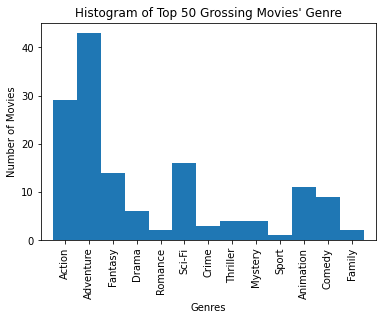

In [63]:
plt.hist(top_50_gross_join_explode['genres'], bins=np.arange(14) - 0.5)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title(r"Histogram of Top 50 Grossing Movies' Genre")
plt.xticks(rotation = 90)
plt.xticks(range(13))
plt.xlim([-1,13])

(-1.0, 19.0)

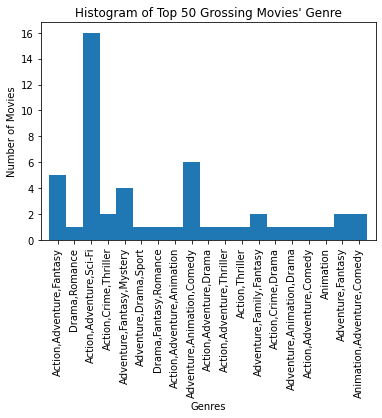

In [64]:
plt.hist(top_50_gross_join_copy['genres'], bins=np.arange(20)-0.5)
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title(r"Histogram of Top 50 Grossing Movies' Genre")
plt.xticks(rotation = 90)
plt.xticks(range(19))
plt.xlim([-1,19])


#### Conclusion: 
* Combining Action and Adventure genres with Sci-Fi or Fantasy results in movies with the highest worldwide gross.

### How much should Microsoft spend on this movie?
* I will correlate worldwide gross to budget because my guess is Microsoft wants to make money on the film and a high worldwide gross usually means the film is well-liked.

#### Explore the budget dataframe.

In [65]:
budget_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')


In [66]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [70]:
budget_df.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


#### Convert Production Budget and Worldwide Gross to integers.

In [71]:
convert_budget = budget_df.copy()
convert_budget['worldwide_gross'] = convert_budget['worldwide_gross'].str.replace(',', '')
convert_budget['worldwide_gross'] = convert_budget['worldwide_gross'].str.replace('$', '')
convert_budget['worldwide_gross'] = convert_budget['worldwide_gross'].astype(int)
convert_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1316721747


In [72]:
convert_budget['production_budget'] = convert_budget['production_budget'].str.replace(',', '')
convert_budget['production_budget'] = convert_budget['production_budget'].str.replace('$', '')
convert_budget['production_budget'] = convert_budget['production_budget'].astype(int)
convert_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747


#### Plot Top 100 Grossing Movies by Production Budget

In [74]:
top_100_gross_plot = convert_budget.copy()
top_100_gross_plot = top_100_gross_plot.nlargest(100,['worldwide_gross'])
top_100_gross_plot.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279
42,43,"Dec 19, 1997",Titanic,200000000,"$659,363,944",2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,"$936,662,225",2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,"$678,815,482",2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,"$652,270,625",1648854864


Text(0.5, 1.0, 'Production Budget to Worldwide Gross\nTop 100 Grossing Movies')

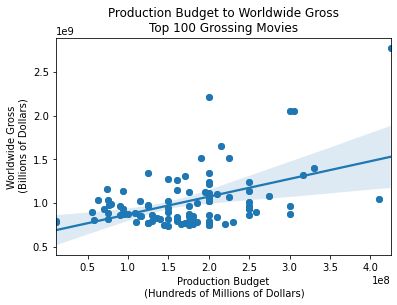

In [144]:
#need best-fit line and r value
ex = top_100_gross_plot['production_budget']
why = top_100_gross_plot['worldwide_gross']
plt.scatter(ex,why)
sns.regplot(x=ex, y=why)
plt.xlabel('Production Budget\n (Hundreds of Millions of Dollars)')
plt.ylabel('Worldwide Gross\n (Billions of Dollars)')
plt.title('Production Budget to Worldwide Gross\nTop 100 Grossing Movies')



In [146]:
#My attempt at finding the linear regression statistics.

#import statsmodels.api as sm
#import statsmodels.formula.api as smf

#results = smf.ols('production_budget + worldwide_gross', data=top_100_gross_plot).fit()
#print(results.summary())

#### The Production Budget to Worldwide Gross shows positive correlation, meaning that as studios spend more, their movies tend to make more money.
* I recommend that Microsoft spend 50-400 million dollars making the movie because this is the spending range for nearly all of the top 100 grossing movies.
* All of the movies in this Production Budget range, for the top 100 grossing movies, realized a net profit.

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [67]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [68]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

In [69]:
![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### How does genre effect worldwide gross?

Does genre_id connect to genre in any other dataframe?

genre_id_df = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
genre_id_df

#### genre_id in the genre_id_df does not connect to genre in any  other dataframe that I have available, so I will not use it to correlate genre to worldwide gross.

# creating dataframes from csv's
genre_df = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
title_df = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
worldwide_gross_df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

#exploring dataframes
genre_df

title_df

#### Ensuring that title_df has corresponding movies in genre_df

print(genre_df.loc[genre_df['tconst'] == 'tt9880178'])

#### Exploring worldwide gross to figure out how to trim to top 100 movies

worldwide_gross_df

#### Convert worldwide_gross to int

convert_worldwide_gross = worldwide_gross_df
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].str.replace(',', '')
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].str.replace('$', '')
convert_worldwide_gross['worldwide_gross'] = convert_worldwide_gross['worldwide_gross'].astype(int)
convert_worldwide_gross.head()

#### Trimming wordwide_gross_df to top 100 worldwide gross movies

top_100_gross = convert_worldwide_gross
top_100_gross = top_100_gross.nlargest(100,['worldwide_gross'])
top_100_gross

#### Joining dataframes to ensure all necessary data is in the same dataframe

genre_df_join = genre_df
top_100_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_100_gross.head()

#### Clean up genre_df and maybe top_100_df by searching for duplicates.

genre_df.info()

##### Considering the entries(146144) equals the Non-Null(146144) for primary_title, I know that I don't need to drop any movies that are listed without a title.

Now, I need to search for the duplicate values in primary_title.

##### Dropping duplicates in primary_title column of genre_df_join

genre_df_join = genre_df
genre_df_join = genre_df_join.drop_duplicates(subset=['primary_title'])
genre_df_join.info()

#### Left join without the duplicates.

top_100_gross_join = top_100_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_100_gross_join.tail(20)

#### Great! Now, were all 100 movies joined?

top_100_gross_join.info()

#### Yes, they were, however only 61 of the movies have genre data. Should I figure out how to pull the top 100 movies with genre data, or add genre data to 39 movies?

print(top_100_gross_join.loc[top_100_gross_join['genres'] == 'NaN'])

top_100_gross_join['genres'].isnull().values.sum()

missing_genre = pd.isnull(top_100_gross_join['genres'])
top_100_gross_join[missing_genre]

print(genre_df.loc[genre_df['primary_title'] == 'Coco'])

#### Now, I see that there are many movies with the same name in the genre_df and this is causing issues.  
* Clearly, Coco should be returning as the tconst tt2380307, rather than the tt10453328.   
* So, I am going to try joining the title_df to the top_100_join as titles_df_join before joining that dataframe with genre_df_join.

title_df.info()

title_df_join = title_df
title_df_join = title_df.drop_duplicates(subset=['title'])
title_df_join.info()

title_df_join = top_100_gross.join(title_df_join.set_index(['title'], verify_integrity=True), on='movie', how='left')
title_df_join.info()

#### Sadly, the title_id column (62 non-null) will not net us much more reliable data than using the titles to join between top_100_df (61 non-null) and genre_df. 

* So, I think I will clean up the top_100_join dataframe by manually checking and changing the relevant movies.

* In order to cut down on some of the work, I will cut it down to the top 50 grossing movies.

#### trimming wordwide_gross_df to top 50 worldwide gross movies

top_50_gross = convert_worldwide_gross
top_50_gross = top_100_gross.nlargest(50,['worldwide_gross'])
top_50_gross.head()

#### Join top_50_gross to genre_df_join

top_50_gross_join = top_50_gross.join(genre_df_join.set_index(['primary_title'], verify_integrity=True), on='movie', how='left')
top_50_gross_join

#### Find and replace NaN and incorrect genres

missing_genre_50 = pd.isnull(top_50_gross_join['genres'])
missing_genre = top_50_gross_join[missing_genre_50]
missing_genre

missing_genre.at[5,'genres'] == "Action,Adventure,Sci-Fi"
missing_genre

##### 14 movie genres to add - I can do this.

missing_genre_replaced = missing_genre["genres"].replace"Action,Adventure,Sci-Fi", "Adventure,Fantasy,Mystery"]})
missing_genre_replaced


replace_val_top_50 = top_50_gross_join
replace_val_top_50.replace(to_replace=)

I am pausing and coming back to this - now I am going to start making the histogram.

#### Making the Histogram of Genre's for Top 50 Grossing Movies

genre_columns = top_50_gross_join
values = True if 'Adventure' in genre_columns['genres']
        Else:
            return False
genre_columns['Adventure'] = values
genre_columns

top_50_gross_join.info()

fig, ax = plt.hist(top_50_gross_join['genres'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

SyntaxError: invalid syntax (<ipython-input-69-4cf531359311>, line 5)